<a href="https://colab.research.google.com/github/KeshavAman/Movie-review-prediction/blob/main/IMDB_movie_review_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [7]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Movie-review-prediction/main/IMDB_Dataset.csv')
dataset.head(7)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive


In [8]:
dataset.describe().T

,count,unique,top,freq
review,2954,2954,I'm assuming the filmmakers heart was in the r...,1
sentiment,2954,2,positive,1486


In [9]:
print('Rows and Columns of dataset :',dataset.shape)

Rows and Columns of dataset : (2954, 2)


**Checking and Dropping null values**

In [10]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
dataset = dataset.dropna(axis = 1)
dataset.shape

(2954, 2)

**Value count**

In [12]:
dataset['sentiment'].value_counts()

positive    1486
negative    1468
Name: sentiment, dtype: int64

**Visualize the value count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


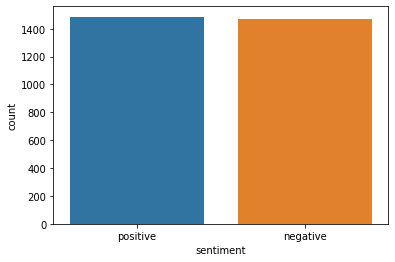

In [13]:
sns.countplot(dataset['sentiment'], label = 'count')

**Preprocessing of dataset**

In [17]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataset['sentiment'] = label.fit_transform(dataset['sentiment'])

**Value count after preprocessing**

In [18]:
dataset['sentiment'].value_counts()

1    1486
0    1468
Name: sentiment, dtype: int64

**Using CountVectorizer to convert text into tokens/features**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

**Splitting of dataset**

In [39]:
from sklearn.model_selection import train_test_split

X = dataset.review
y = dataset.sentiment
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

**Using training data to transform text into counts of features for each message**

In [40]:
vect.fit(X_train)
X_train = vect.transform(X_train) 
X_test = vect.transform(X_test)

**Dimensions**

In [47]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (2363, 7831)
X_test shape :  (591, 7831)
Y_train shape :  (1477,)
Y_test shape :  (1477,)


**Using Naive Bayes ( MultinomialNB )**

In [54]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  81.89509306260575
Precision Score :  80.98591549295774
Recall Score :  81.2720848056537
F1 score :  81.12874779541447
Confusion Matrix: 
[[254  54]
 [ 53 230]]


**Using Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  86.46362098138748
Precision Score :  83.94648829431438
Recall Score :  88.69257950530034
F1 score :  86.25429553264604
Confusion Matrix: 
[[260  48]
 [ 32 251]]


**Using Support Vector Classifier ( LinearSVC )**

In [62]:
from sklearn.svm import SVC, LinearSVC

SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  84.77157360406092
Precision Score :  82.93515358361775
Recall Score :  85.86572438162544
F1 score :  84.375
Confusion Matrix: 
[[258  50]
 [ 40 243]]


**Using Support Vector Classifier**

In [64]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  82.40270727580372
Precision Score :  78.77813504823152
Recall Score :  86.57243816254417
F1 score :  82.49158249158249
Confusion Matrix: 
[[242  66]
 [ 38 245]]


**Using KNN**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  58.03722504230119
Precision Score :  54.74254742547425
Recall Score :  71.37809187279152
F1 score :  61.963190184049076
Confusion Matrix: 
[[141 167]
 [ 81 202]]


**Using Random Forest Classifier**

In [76]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  82.57191201353638
Precision Score :  80.20134228187919
Recall Score :  84.45229681978799
F1 score :  82.27194492254733
Confusion Matrix: 
[[249  59]
 [ 44 239]]


**Using Decision Tree Classifier**

In [78]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  70.38917089678512
Precision Score :  67.53246753246754
Recall Score :  73.4982332155477
F1 score :  70.3891708967851
Confusion Matrix: 
[[208 100]
 [ 75 208]]
